### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas as pd
from google.colab import files
data_load = files.upload()

Saving Khalij.Fars_acs.csv to Khalij.Fars_acs.csv


In [ ]:
df=pd.read_csv('Khalij.Fars_acs.csv')

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.tail()

,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
1764,Khalij.Fars,20210203,8920,9350,8700,8740,3.189220e+11,36476527,4512,D,9150,8700
1765,Khalij.Fars,20210206,8750,8900,8310,8350,2.730120e+11,32694197,2902,D,8740,8310
1766,Khalij.Fars,20210207,8450,8760,8450,8750,1.662200e+11,18998865,2012,D,8350,8760
1767,Khalij.Fars,20210208,9180,9180,9000,9170,6.256270e+11,68231394,5599,D,8750,9180
1768,Khalij.Fars,20210209,9300,9500,9040,9320,3.290620e+11,35322736,6612,D,9170,9330


In [ ]:
df1=df.reset_index()['<CLOSE>']
df_date = df.reset_index()['<DTYYYYMMDD>']

In [ ]:
df_date

0       20130416
1       20130417
2       20130420
3       20130421
4       20130422
          ...   
1764    20210203
1765    20210206
1766    20210207
1767    20210208
1768    20210209
Name: <DTYYYYMMDD>, Length: 1769, dtype: int64

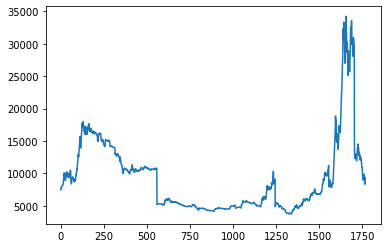

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:
df1

0       7500
1       7788
2       7754
3       7713
4       8003
        ... 
1764    8740
1765    8350
1766    8750
1767    9170
1768    9320
Name: <CLOSE>, Length: 1769, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

[[0.12249049]
 [0.13193807]
 [0.13082273]
 ...
 [0.1634956 ]
 [0.17727332]
 [0.18219394]]


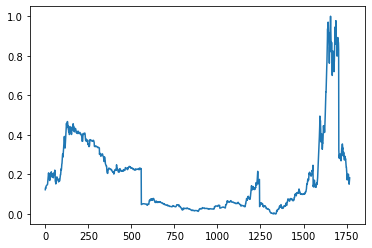

In [ ]:
print(df1)
plt.plot(df1)

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
date_size=int(len(df_date))

#date_ar01 = array([df_date])
#date_ar02=date_ar01[0:date_size,:]
#date_ar02

In [ ]:
training_size,test_size

(1149, 620)

In [ ]:
train_data

array([[0.12249049],
       [0.13193807],
       [0.13082273],
       ...,
       [0.0416612 ],
       [0.04090671],
       [0.04146437]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1048, 100)
(1048,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(519, 100)
(519,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
'''model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')'''

model.add(LSTM(128, input_shape=(100,1), return_sequences=True))
model.add(LSTM(64, input_shape=(100,1), return_sequences=False))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
17/17 [==============================] - 5s 278ms/step - loss: 2.4298e-04 - val_loss: 0.0037
Epoch 2/10
17/17 [==============================] - 5s 273ms/step - loss: 2.5448e-04 - val_loss: 0.0034
Epoch 3/10
17/17 [==============================] - 5s 277ms/step - loss: 2.0890e-04 - val_loss: 0.0035
Epoch 4/10
17/17 [==============================] - 5s 276ms/step - loss: 2.4884e-04 - val_loss: 0.0033
Epoch 5/10
17/17 [==============================] - 5s 278ms/step - loss: 2.0574e-04 - val_loss: 0.0032
Epoch 6/10
17/17 [==============================] - 5s 275ms/step - loss: 1.9843e-04 - val_loss: 0.0031
Epoch 7/10
17/17 [==============================] - 5s 280ms/step - loss: 1.9742e-04 - val_loss: 0.0031
Epoch 8/10
17/17 [==============================] - 5s 280ms/step - loss: 1.9439e-04 - val_loss: 0.0031
Epoch 9/10
17/17 [==============================] - 5s 274ms/step - loss: 1.9369e-04 - val_loss: 0.0031
Epoch 10/10
17/17 [==============================] - 5s 279ms/st

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9499.956546458056

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13461.928029745677

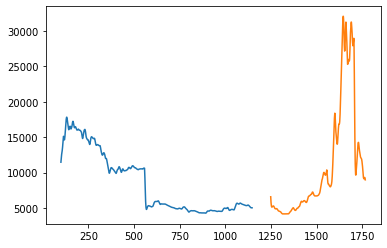

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
#plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

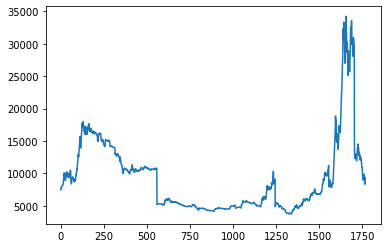

In [ ]:
plt.plot(scaler.inverse_transform(df1))

In [ ]:
lenput=len(test_data)-100

In [ ]:
x_input=test_data[lenput:].reshape(1,-1)
x_input


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16638756]
101
1 day input [0.82482614 0.78119669 0.73658313 0.76774701 0.7972707  0.7684031
 0.72411757 0.719525   0.7611862  0.77266763 0.81432883 0.86091064
 0.90978874 0.9455452  0.90913266 0.85927044 0.88124918 0.92717491
 0.97769322 0.93242357 0.87993702 0.85828631 0.85927044 0.88879412
 0.84286839 0.79825482 0.83040283 0.85008529 0.85599003 0.89240257
 0.88551371 0.88092114 0.87304816 0.86451909 0.82909067 0.32357958
 0.30356909 0.28224642 0.29799239 0.29372786 0.28290251 0.27995014
 0.28651096 0.302913   0.30192888 0.28782312 0.28880724 0.27043695
 0.26879675 0.28716704 0.30750558 0.32784411 0.33243669 0.33309277
 0.34490224 0.35277523 0.35375935 0.33670122 0.32915628 0.33309277
 0.30028868 0.29339982 0.30455321 0.31111403 0.31177011 0.30028868
 0.29110353 0.27338932 0.27470148 0.29307178 0.28487075 0.28651096
 0.27371736 0.2740454  0.27995014 0.27207716 0.25829944 0.24222543
 0.23697677 0.23697677 0.22287101 0.20646897 0.19039496 0.18088177
 0.17169663 0.18416218 0.20023619 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
lenform=len(df1)-100

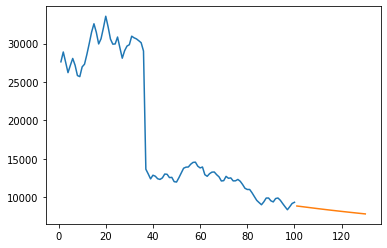

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[lenform:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

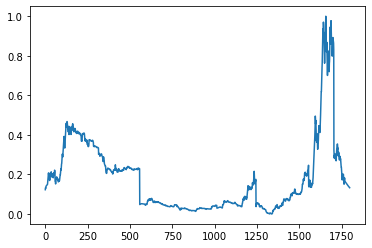

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

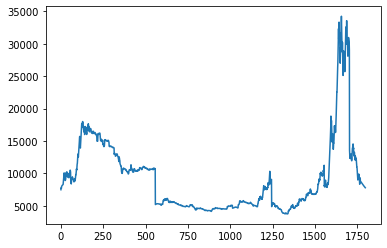

In [ ]:
plt.plot(df3)

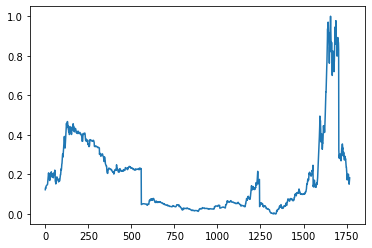

In [ ]:
plt.plot(df1)